# 🌸 5장 단일 변수 데이터의 탐색 (Exploring Single Variable Data)

---

## 🎯 학습 목표

- 단일 변수의 **분포(Distribution)** 를 이해하고 요약할 수 있다.  
- `pandas`, `seaborn`, `matplotlib` 을 활용하여 **도수분포표, 히스토그램, 상자그림** 등을 작성할 수 있다.  
- **평균, 중앙값, 사분위수, 분산, 표준편차** 등을 직접 계산해본다.  
- 시각화를 통해 데이터의 **중심 경향**과 **산포(흩어짐)** 를 직관적으로 이해한다.

---

## 🧠 핵심 개념 요약

| 구분 | 의미 | 함수 예시 |
|------|------|------------|
| 중심 경향 | 데이터의 중심값 | `mean()`, `median()` |
| 퍼짐 정도 | 데이터의 흩어짐 | `var()`, `std()`, `quantile()` |
| 시각화 | 데이터의 형태 파악 | `hist()`, `boxplot()`, `bar()`, `pie()` |

---

In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib.font_manager")

# 필요한 라이브러리 불러오기
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn 내장 iris 데이터 셋 불러오기
iris = sns.load_dataset('iris')

# 데이터 확인
print("iris 데이터 미리보기:")
display(iris.head())

print("\n컬럼 정보:")
print(iris.info())

iris 데이터 미리보기:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa



컬럼 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


## 📊 1. 단일 변수의 도수분포표 (Frequency Table)

- 도수분포표란, 특정 변수의 각 값이 **얼마나 자주 등장했는지**를 보여주는 표입니다.  
- `value_counts()`를 이용하여 손쉽게 작성할 수 있습니다.  
- 예시: `iris` 데이터의 품종(`species`)별 개수를 계산합니다.

In [2]:
# species(품종)별 개수 계산

species_count = iris['species'].value_counts()

# ▶ value_counts(): 각 품종이 데이터에 몇 번 등장했는지를 세는 함수 (도수분포표 생성)
print("품종별 도수분포표:\n", species_count)

품종별 도수분포표:
 species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


In [3]:
# 비율 계산

species_ratio = species_count / species_count.sum()

# ▶ sum(): 전체 개수를 계산하여 각 품종의 비율(%)을 구하기 위해 사용
# ▶ '/' 연산: 각 품종의 개수를 전체 개수로 나누어 비율을 구함
print("\n품종별 비율(%)\n", species_ratio * 100)
# ▶ '* 100': 소수 비율을 백분율(%)로 변환


품종별 비율(%)
 species
setosa        33.333333
versicolor    33.333333
virginica     33.333333
Name: count, dtype: float64


## 🎨 2. 범주형 변수의 시각화 (Bar chart / Pie chart)

- **막대그래프(`bar`)** → 각 **범주의 빈도(횟수)** 를 비교할 때 사용  
- **원그래프(`pie`)** → 각 **범주의 비율(%)** 을 한눈에 확인할 때 사용  

---

### 📘 핵심 요약 및 예시

- **`plot.bar()`** → **빈도(횟수)** 비교에 적합  
  - 예: 학과별 학생 수, 취미별 선호도 등  
  - `rot` 옵션으로 **x축 글자 각도 조정** 가능  
    - `rot=0` → 글자가 수평 (기본값)  
    - `rot=45` → 대각선 표시 (글자가 길 때 유용)  
    - `rot=90` → 세로 표시 (많은 항목일 때 가독성 확보)

- **`plot.pie()`** → **비율(%)** 비교에 적합  
  - 예: 품종별 비율, 응답 비율 등  
  - `autopct` 옵션으로 **백분율 표시 형식** 지정  
    - `autopct='%1.0f%%'` → 정수(예: 33%)  
    - `autopct='%1.1f%%'` → 소수점 한 자리(예: 33.3%)  
    - `autopct='%1.2f%%'` → 소수점 두 자리(예: 33.33%)

---

### 💡 간단 실습 예시 (Colab에서 실행 가능)

```python
import pandas as pd
import matplotlib.pyplot as plt

# 예시 데이터
data = pd.Series(['A', 'B', 'A', 'C', 'B', 'A', 'C', 'B', 'C'])
count = data.value_counts()

# 막대그래프 (라벨 회전 비교)
count.plot.bar(rot=0, title='rot=0 (수평)')
plt.show()

count.plot.bar(rot=45, title='rot=45 (대각선)')
plt.show()

# 원그래프 (autopct 비교)
count.plot.pie(autopct='%1.0f%%', title='소수점 없음')
plt.show()

count.plot.pie(autopct='%1.1f%%', title='소수점 1자리 표시')
plt.show()

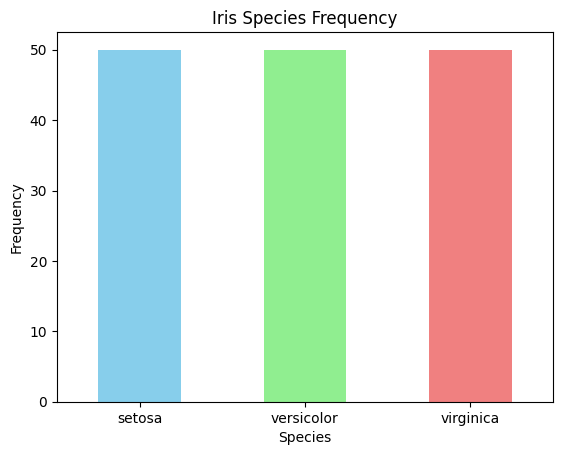

In [4]:
# ▶ 막대그래프 (Bar Chart)

species_count.plot.bar(
    xlabel='Species',  # x축 레이블 (품종 이름)
    ylabel='Frequency',  # y축 레이블 (빈도)
    title='Iris Species Frequency',  # 그래프 제목
    rot=0,  # x축 라벨 회전 각도 (0이면 수평)
    color=['skyblue', 'lightgreen', 'lightcoral']  # 각 막대 색상 지정
)
plt.show()  # 그래프 출력

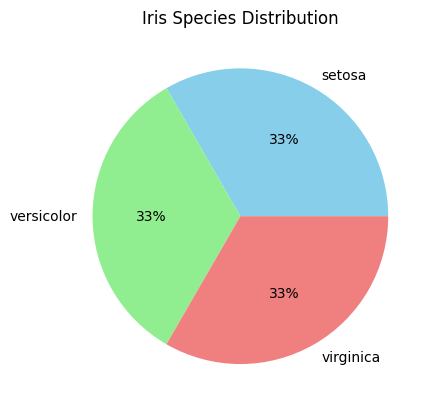

In [5]:
# ▶ 원그래프 (Pie Chart)

species_count.plot.pie(
    autopct='%1.0f%%',  # 각 조각에 백분율(%) 표시
    ylabel='',  # 불필요한 y축 레이블 제거
    title='Iris Species Distribution',  # 그래프 제목
    colors=['skyblue', 'lightgreen', 'lightcoral']  # 품종별 색상 지정
)
plt.show()  # 그래프 출력

## 📏 3. 연속형 변수의 중심 경향 (Mean, Median)

- **평균(mean)** : 데이터의 중심을 대표하는 값  
- **중앙값(median)** : 데이터 중앙에 위치한 값  
- **절사평균(trimmed mean)** : 극단값(이상치)을 제외한 평균

In [6]:
from scipy import stats  # 통계 계산을 위한 scipy 라이브러리 (절사평균에 사용)

# 데이터 선택: 붓꽃(iris) 데이터의 꽃잎 길이(Petal Length)
petal_length = iris['petal_length']

In [7]:
# mean(): 전체 데이터의 평균값을 계산 → 데이터의 대표값 확인에 사용
# round(x, 2): 소수점 아래 둘째 자리까지 반올림 (예: 3.14159 → 3.14)

print("평균:", round(petal_length.mean(), 2))

평균: 3.76


In [8]:
# median(): 중앙값 계산 → 극단값(이상치)의 영향을 받지 않는 중심값

print("중앙값:", round(petal_length.median(), 2))

중앙값: 4.35


In [9]:
# stats.trim_mean(data, 비율): 양 끝 비율만큼 데이터를 제외하고 평균 계산
# 여기서는 상·하위 10% 데이터를 제외하고 평균을 계산함
print("절사평균(상하위 10% 제외):", round(stats.trim_mean(petal_length, 0.1), 2))

절사평균(상하위 10% 제외): 3.76


## 📦 4. 사분위수(Quantile)와 요약통계(describe)

- **Q1 (25%)**, **Q2 (50%)**, **Q3 (75%)** 를 통해 데이터의 분포 범위를 알 수 있습니다.  
- `describe()` 함수는 데이터의 **평균, 표준편차, 최솟값, 최댓값** 등을 한 번에 보여줍니다.

In [10]:
import numpy as np  # 수학 계산용 라이브러리 (특히 배열 처리에 유용)

# 분위수(quantile) 계산 ------------------------------------------
# quantile(p): 누적 비율 p에 해당하는 데이터 값을 반환
# Q1, Q2, Q3은 각각 25%, 50%, 75% 지점을 의미 (데이터 분포의 위치 파악에 사용)

print("Q1 (25%):", petal_length.quantile(0.25))
print("Q2 (50%):", petal_length.quantile(0.5))
print("Q3 (75%):", petal_length.quantile(0.75))

Q1 (25%): 1.6
Q2 (50%): 4.35
Q3 (75%): 5.1


In [11]:
# describe(): 평균, 표준편차, 최솟값, 사분위수 등 요약 통계 정보를 한 번에 제공
print("\n요약 통계 정보:")
display(petal_length.describe())


요약 통계 정보:


,petal_length
count,150.000000
mean,3.758000
std,1.765298
min,1.000000
25%,1.600000
50%,4.350000
75%,5.100000
max,6.900000


In [12]:
# np.arange(시작, 끝, 간격): 연속된 숫자 생성 → 여기서는 0~1까지 0.1 간격 (즉, 10%, 20%, ... 100%)
# quantile(np.arange(0, 1.1, 0.1)): 10% 단위 분위수를 계산 → 데이터의 세부 분포를 확인할 때 사용

print("\n10% 단위 분위수:")
display(petal_length.quantile(np.arange(0, 1.1, 0.1)))


10% 단위 분위수:


,petal_length
0.0,1.00
0.1,1.40
0.2,1.50
0.3,1.70
0.4,3.90
0.5,4.35
0.6,4.64
0.7,5.00
0.8,5.32
0.9,5.80


## ⚖️ 5. 산포(Variability): 분산과 표준편차

- **분산(var)**: 데이터가 평균으로부터 얼마나 떨어져 있는지를 제곱 단위로 계산  
- **표준편차(std)**: 분산의 제곱근 → 실제 단위로 해석 가능

In [13]:
# 데이터의 분산(variance)과 표준편차(standard deviation) 계산
# → 데이터가 평균을 기준으로 얼마나 퍼져 있는지를 확인하는 지표

print("분산:", round(petal_length.var(), 2))
# var(): 분산 계산 → 데이터의 흩어짐 정도 (값이 클수록 데이터가 퍼져 있음)
# round( , 2): 소수점 둘째 자리까지 반올림하여 깔끔하게 표시

분산: 3.12


In [14]:
print("표준편차:", round(petal_length.std(), 2))
# std(): 표준편차 계산 → 분산의 제곱근 (단위가 원래 데이터와 동일)
# round( , 2): 표준편차 값도 소수점 둘째 자리까지 반올림 출력

표준편차: 1.77


## 📊 6. 히스토그램 (Histogram)

- 연속형 변수의 분포를 시각적으로 확인하는 그래프  
- `bins` 매개변수로 구간 개수를 조정할 수 있습니다.

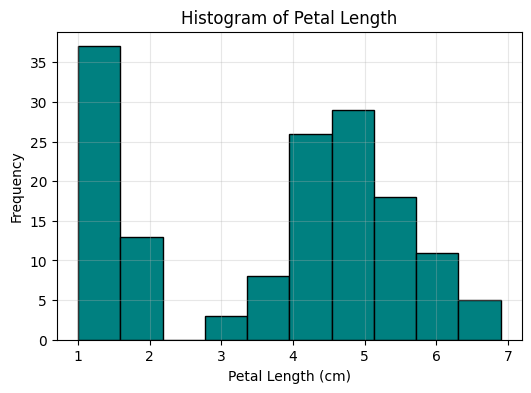

In [15]:
# 그래프 크기 지정 (가로 6인치, 세로 4인치)
plt.figure(figsize=(6, 4))

# 히스토그램(histogram) 그리기
plt.hist(
    petal_length,          # 분석할 데이터 (꽃잎 길이)
    bins=10,               # 막대(구간)의 개수 지정 — 값이 클수록 막대가 세분화됨
    color='teal',          # 막대 색상 지정
    edgecolor='black'      # 막대 테두리 색상 지정
)

# 그래프 제목 및 축 레이블 지정
plt.title('Histogram of Petal Length')       # 그래프 제목
plt.xlabel('Petal Length (cm)')              # x축 이름
plt.ylabel('Frequency')                      # y축 이름

# 격자선 추가 (alpha=0.3 → 투명도 30%)
plt.grid(alpha=0.3)

# 그래프 출력
plt.show()

## 📦 7. 상자그림(Boxplot)

- 사분위수(Q1, Q2, Q3)를 이용하여 데이터의 분포를 시각화  
- **이상치(outlier)** 를 한눈에 확인할 수 있음  
- 그룹별 비교(예: 품종별 꽃잎 길이)도 가능

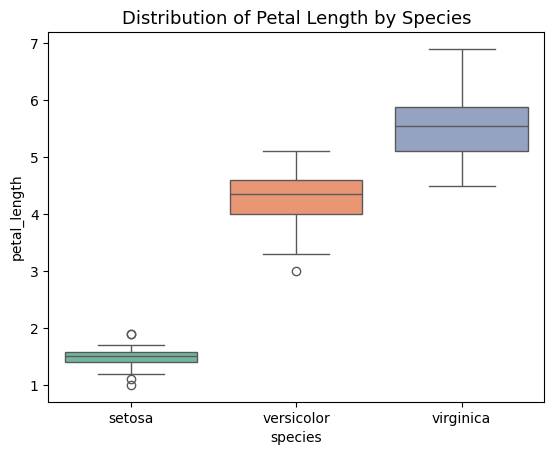

In [16]:
# 🧩 품종별 꽃잎 길이(Boxplot) 시각화
sns.boxplot(
    x='species',          # x축 변수: 품종(species)
    y='petal_length',     # y축 변수: 꽃잎 길이(petal_length)
    hue='species',        # 색상 구분 기준을 species로 지정 → 각 품종마다 다른 색
    data=iris,            # 사용할 데이터 셋(iris 내장 데이터)
    palette='Set2',       # Seaborn의 색상 팔레트 지정(은은한 파스텔톤)
    legend=False          # 범례(legend) 비활성화 → 중복 표기 방지
)

# 그래프 제목 표시
plt.title('Distribution of Petal Length by Species', fontsize=13)
plt.show()

## 🔍 8. 종합 시각화 (Multiple Graphs)

- 여러 변수나 형태의 그래프를 한 화면에 비교하여 데이터의 특징을 다각도로 관찰합니다.

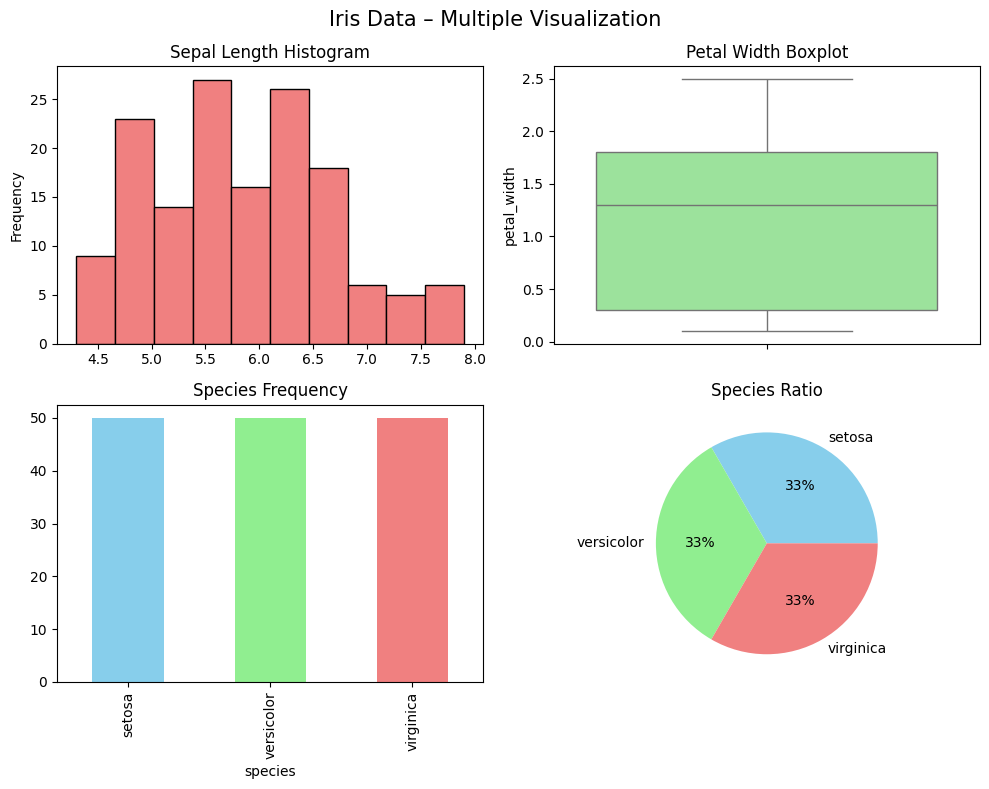

In [17]:
# (1) 2x2 형태로 그래프 4개를 한 화면에 배치 (fig: 전체 그래프, axes: 각 위치)
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# (2) 히스토그램 - 꽃받침 길이(sepal_length)의 분포를 표현
iris['sepal_length'].plot.hist(
    ax=axes[0, 0],                # 첫 번째 그래프 위치
    color='lightcoral',           # 막대 색상
    edgecolor='black',            # 막대 테두리 색상
    title='Sepal Length Histogram' # 그래프 제목
)

# (3) 박스플롯 - 꽃잎 너비(petal_width)의 이상치, 중앙값 등 시각화
sns.boxplot(
    y='petal_width',              # y축 변수
    data=iris,                    # 데이터 셋 지정
    ax=axes[0, 1],                # 두 번째 그래프 위치
    color='lightgreen'            # 박스 색상
)
axes[0, 1].set_title('Petal Width Boxplot')  # 그래프 제목 지정

# (4) 막대그래프 - 품종별 개수 비교
species_count.plot.bar(
    ax=axes[1, 0],                # 세 번째 그래프 위치
    color=['skyblue', 'lightgreen', 'lightcoral'],  # 막대 색상
    title='Species Frequency'     # 그래프 제목
)

# (5) 원그래프 - 품종별 비율 시각화
species_count.plot.pie(
    ax=axes[1, 1],                # 네 번째 그래프 위치
    autopct='%1.0f%%',            # 백분율 표시 (소수점 없이 정수형)
    ylabel='',                    # 불필요한 y축 라벨 제거
    colors=['skyblue', 'lightgreen', 'lightcoral'], # 색상 지정
    title='Species Ratio'         # 그래프 제목
)

# (6) 전체 그래프의 제목과 배치 조정
fig.suptitle('Iris Data – Multiple Visualization', fontsize=15)  # 통합 제목
plt.tight_layout()  # 그래프 간 여백 자동 조정
plt.show()

## 🎯 예제 1. 범주형 데이터 탐색 — 선호 취미 분포

- **목적:** 범주형 데이터의 **도수(빈도)** 를 계산하고,  
  막대그래프와 원그래프로 분포를 시각화한다.

- **주요 개념**
  - `value_counts()` : 각 항목의 빈도 계산
  - `plot.bar()` : 막대그래프 (비교 중심)
  - `plot.pie()` : 원그래프 (비율 중심)

- **활용 예시**
  - 학생들의 선호 취미, 과목 선택, SNS 이용 시간대 등

In [18]:
# 📘 Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ 데이터 생성 (취미 목록)
hobby = pd.Series([
    'Hiking', 'Fishing', 'Golf', 'Swimming', 'Hiking', 'Hiking',
    'Fishing', 'Swimming', 'Hiking', 'Fishing', 'Swimming', 'Golf'
])

In [19]:
# 2️⃣ 도수분포표 작성 (각 취미가 몇 번 등장하는지 계산)
fd = hobby.value_counts()
print("Frequency Table:\n", fd, "\n")

Frequency Table:
 Hiking      4
Fishing     3
Swimming    3
Golf        2
Name: count, dtype: int64 



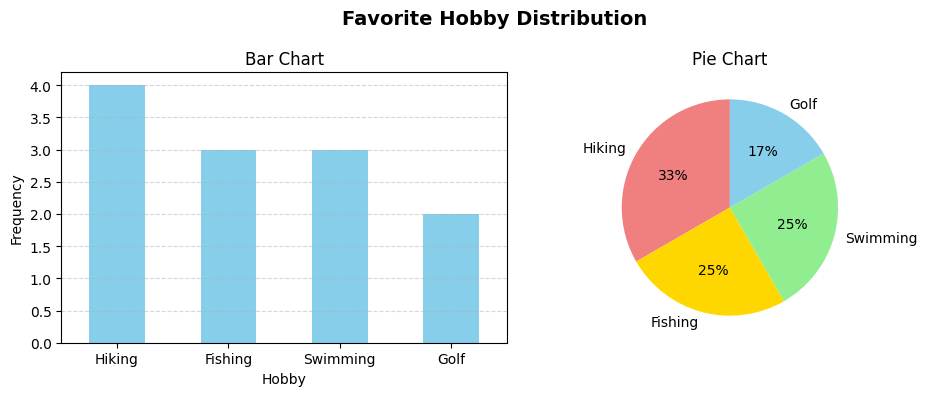

In [20]:
# 3️⃣ 시각화: 막대그래프 & 원그래프
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))  # 1행 2열의 그래프 생성

# 왼쪽 그래프 — 막대그래프 (Bar Chart)
fd.plot.bar(
    ax=axes[0],               # 왼쪽 위치에 그래프 배치
    color='skyblue',          # 막대 색상 지정
    rot=0                     # x축 레이블을 수평으로 표시
)
axes[0].set_title('Bar Chart')            # 그래프 제목
axes[0].set_xlabel('Hobby')               # x축 이름
axes[0].set_ylabel('Frequency')           # y축 이름
axes[0].grid(True, axis='y', linestyle='--', alpha=0.5)  # y축에만 점선 격자 추가

# 오른쪽 그래프 — 원그래프 (Pie Chart)
fd.plot.pie(
    ax=axes[1],
    autopct='%1.0f%%',        # 백분율(%) 표시, 소수점 없이 정수로 표현
    startangle=90,            # 시작 각도 90도로 회전 (위쪽부터 시작)
    colors=['lightcoral', 'gold', 'lightgreen', 'skyblue']  # 각 조각 색상
)
axes[1].set_ylabel('')                     # y축 레이블 제거 (불필요)
axes[1].set_title('Pie Chart')             # 그래프 제목

# 전체 그래프 제목
fig.suptitle('Favorite Hobby Distribution', fontsize=14, fontweight='bold')

# 여백 자동 조정
plt.tight_layout()
plt.show()

### 🔍 결과 해석
- **막대그래프(bar):** 취미별 절대 빈도 비교  
  → "등산"이 가장 많고, "골프"가 가장 적음  
- **원그래프(pie):** 각 취미의 **비율(%)** 비교  
  → 등산이 전체의 절반 가까이 차지  

👉 **범주형 데이터**에서는 "비교"는 막대그래프, "비율"은 원그래프가 적합!

## 🏡 예제 2. 연속형 데이터 탐색 — 자동차 연비 (mpg 데이터 예시)

- **목적:** 연속형 데이터의 **중심 경향**(평균, 중앙값)과  
  **분포 형태**(히스토그램, 박스플롯, 사분위수)를 분석한다.

- **핵심 개념**
  - `mean()`, `median()` : 중심 경향
  - `quantile()` : 사분위수 (Q1, Q2, Q3)
  - `plot.hist()` : 분포 형태
  - `plot.box()` : 이상치 확인
  - `pd.cut()` : 구간별 그룹화

- **자동차 연비(`mpg`)** 의 분포를 분석하여  
  차량 효율성의 전반적인 경향과 이상치를 파악할 때 활용

In [22]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ 데이터 불러오기 (Seaborn 내장 데이터 셋 사용)

df = sns.load_dataset('mpg')  # 자동차 연비(miles per gallon) 데이터

df = df.dropna(subset=['mpg'])  # 결측값(NaN) 제거 → 통계 분석에 오류 방지

In [23]:
# 2️⃣ 주요 변수 선택
house_price = df['mpg']  # 연비(mpg)를 '주택가격'처럼 가정해 분석
print("기본 통계량:\n", house_price.describe(), "\n")  # describe() → 요약 통계 정보

기본 통계량:
 count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64 



In [24]:
# 3️⃣ 평균, 중앙값, 사분위수 계산
print("평균(mean):", house_price.mean())        # 평균 → 데이터 중심값
print("중앙값(median):", house_price.median())  # 중앙값 → 이상치 영향을 줄인 중심값
print("사분위수(25%, 50%, 75%):")
print(house_price.quantile([0.25, 0.5, 0.75]), "\n")  # quantile() → 구간별 분포 확인

평균(mean): 23.514572864321607
중앙값(median): 23.0
사분위수(25%, 50%, 75%):
0.25    17.5
0.50    23.0
0.75    29.0
Name: mpg, dtype: float64 



In [25]:
# 4️⃣ 사분위수 기준으로 데이터 구간화 (Q1~Q4)

quan = house_price.quantile([0.25, 0.5, 0.75])  # 1, 2, 3사분위값
bins = [house_price.min(), quan[0.25], quan[0.5], quan[0.75], house_price.max()]

# bins → 데이터의 최솟값~최댓값을 4개의 구간으로 분할

labels = ['Q1(Low)', 'Q2', 'Q3', 'Q4(High)']  # 각 구간의 레이블
grp = pd.cut(house_price, bins=bins, labels=labels, include_lowest=True)

# pd.cut() → 연속형 데이터를 구간(범주형)으로 나눔

# 각 구간(Q1~Q4)의 평균 계산
avg = house_price.groupby(grp).mean()
print("구간별 평균:\n", avg, "\n")

구간별 평균:
 mpg
Q1(Low)     14.424038
Q2          20.073786
Q3          26.131915
Q4(High)    34.378351
Name: mpg, dtype: float64 



/tmp/ipython-input-3784850372.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg = house_price.groupby(grp).mean()


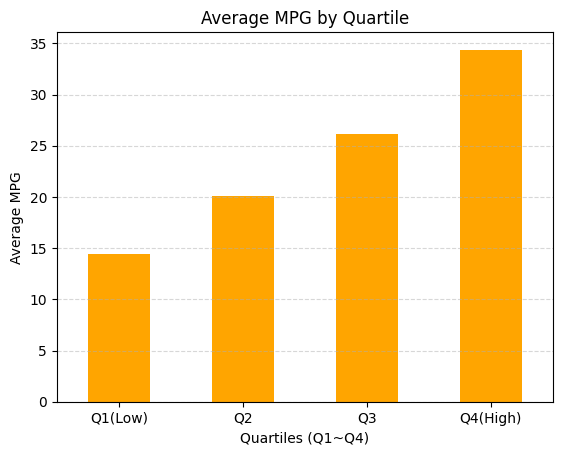

In [26]:
# 5️⃣ 시각화 ① 사분위수별 평균 막대그래프
avg.plot.bar(
    color='orange',   # 막대 색상
    rot=0             # 레이블 수평 정렬
)
plt.title('Average MPG by Quartile')  # 그래프 제목
plt.xlabel('Quartiles (Q1~Q4)')       # x축 이름
plt.ylabel('Average MPG')             # y축 이름
plt.grid(True, axis='y', linestyle='--', alpha=0.5)  # y축 점선 격자
plt.show()

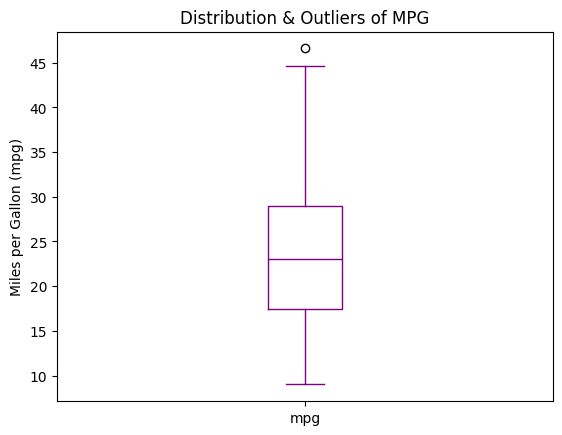

In [27]:
# 6️⃣ 시각화 ② 상자그림(Boxplot)
house_price.plot.box(
    color='purple'  # 상자 색상
)
plt.title('Distribution & Outliers of MPG')  # 제목
plt.ylabel('Miles per Gallon (mpg)')         # y축 이름
plt.show()

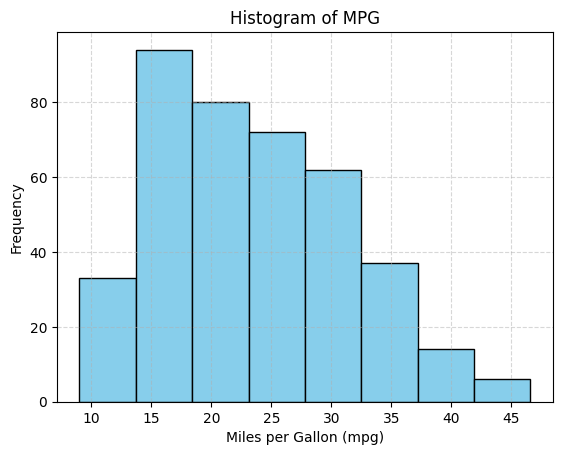

In [28]:
# 7️⃣ 시각화 ③ 히스토그램(Histogram)
house_price.plot.hist(
    bins=8,                   # 막대 개수 → 구간 세분화 정도
    color='skyblue',          # 막대 색상
    edgecolor='black'         # 테두리 색상
)
plt.title('Histogram of MPG')             # 제목
plt.xlabel('Miles per Gallon (mpg)')      # x축 이름
plt.ylabel('Frequency')                   # y축 이름
plt.grid(True, linestyle='--', alpha=0.5) # 격자선
plt.show()

### 🔍 결과 해석

- **평균(mean)**: 전체 데이터의 중심을 나타내지만, 이상치에 영향 받음  
- **중앙값(median)**: 중간 위치 값으로, 이상치의 영향을 덜 받음  
- **사분위수(Q1~Q4)**: 데이터를 네 구간으로 나누어 상대적 크기 비교 가능  

**히스토그램**  
- 데이터가 한쪽으로 치우쳐 있으면 “왜도(Skewness)” 존재  

**박스플롯(Boxplot)**  
- 박스 안: 50%의 데이터  
- 선 밖 점(●): 이상치  

**사분위수별 막대그래프**  
- 각 구간(Q1~Q4)별 평균값을 비교하여 데이터의 “층화 구조” 파악  

📊 결론:  
단일 변수의 분포를 파악하는 것은 데이터 전처리와 이상치 탐색의 첫걸음이며,  
이후 다중 변수 분석(상관, 회귀)로 자연스럽게 이어진다.

## 🏁 정리 (Summary)

- **단일 변수 탐색의 핵심 흐름**  
  1️⃣ 데이터 요약 (`value_counts`, `describe`)  
  2️⃣ 중심과 퍼짐 확인 (`mean`, `std`, `quantile`)  
  3️⃣ 시각화 (`bar`, `pie`, `hist`, `boxplot`)  
- 이러한 기본 탐색이 바로 **EDA(Exploratory Data Analysis)** 의 출발점입니다.  
- 다음 단계에서는 **이변량 분석(두 변수 간 관계 탐색)** 으로 확장됩니다.